1. Can you find how to read h5 files  ?
2. Link with csv data
3. How to load h5 files memory efficiently

In [1]:
!pip install hdf5plugin~=2.0 # https://forum.hdfgroup.org/t/cant-open-directory-usr-local-hdf5-lib-plugin/9738/4
!pip install --quiet tables
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import h5py
import hdf5plugin
import tables
import psutil
import time
import scipy
import scipy.sparse as sps
import gc

In [2]:
DATA_DIR = "/kaggle/input/open-problems-multimodal/"
FP_CELL_METADATA = os.path.join(DATA_DIR,"metadata.csv")

FP_CITE_TRAIN_INPUTS = os.path.join(DATA_DIR,"train_cite_inputs.h5")
FP_CITE_TRAIN_TARGETS = os.path.join(DATA_DIR,"train_cite_targets.h5")
FP_CITE_TEST_INPUTS = os.path.join(DATA_DIR,"test_cite_inputs.h5")

FP_MULTIOME_TRAIN_INPUTS = os.path.join(DATA_DIR,"train_multi_inputs.h5")
FP_MULTIOME_TRAIN_TARGETS = os.path.join(DATA_DIR,"train_multi_targets.h5")
FP_MULTIOME_TEST_INPUTS = os.path.join(DATA_DIR,"test_multi_inputs.h5")


In [3]:
df_meta = pd.read_csv(FP_CELL_METADATA, index_col='cell_id')
display(df_meta)
if not df_meta.index.duplicated().any(): print('All cell_ids are unique.')
if not df_meta.isna().any().any(): print('There are no missing values.')
    

,day,donor,cell_type,technology
cell_id,,,,
c2150f55becb,2,27678,HSC,citeseq
65b7edf8a4da,2,27678,HSC,citeseq
c1b26cb1057b,2,27678,EryP,citeseq
917168fa6f83,2,27678,NeuP,citeseq
2b29feeca86d,2,27678,EryP,citeseq
...,...,...,...,...
96a60b026659,10,31800,hidden,multiome
d493e546991e,10,31800,hidden,multiome
05666c99aa48,10,31800,hidden,multiome


All cell_ids are unique.
There are no missing values.


In [4]:
##load  h5 file 
filename = '/kaggle/input/open-problems-multimodal/train_multi_inputs.h5'
f2 = h5py.File(filename,'r')#, mode)


print(f2.keys() )
print(f2['train_multi_inputs'].keys())
print('Values of feature matrix:')
print( f2['train_multi_inputs']['block0_values'][:100,:100] )
print('fragment of a DNA ids:')
print( f2['train_multi_inputs']['axis0'][:5] )
print('\nCell Ids:')
print(f2['train_multi_inputs']['axis1'][:5] )

 

<KeysViewHDF5 ['train_multi_inputs']>
<KeysViewHDF5 ['axis0', 'axis1', 'block0_items', 'block0_values']>
Values of feature matrix:
[[0.        0.        0.        ... 0.        0.        0.       ]
 [0.        0.        0.        ... 0.        0.        0.       ]
 [0.        0.        0.        ... 0.        0.        3.0311627]
 ...
 [0.        0.        0.        ... 0.        0.        0.       ]
 [0.        0.        0.        ... 0.        0.        0.       ]
 [0.        0.        0.        ... 0.        0.        0.       ]]
fragment of a DNA ids:
[b'GL000194.1:114519-115365' b'GL000194.1:55758-56597'
 b'GL000194.1:58217-58957' b'GL000194.1:59535-60431'
 b'GL000195.1:119766-120427']

Cell Ids:
[b'56390cf1b95e' b'fc0c60183c33' b'9b4a87e22ad0' b'81cccad8cd81'
 b'15cb3d85c232']


In [5]:
##read using pandas.

df_cite_train_x = pd.read_hdf(FP_CITE_TRAIN_INPUTS)
display(df_cite_train_x.head())

gene_id,ENSG00000121410_A1BG,ENSG00000268895_A1BG-AS1,ENSG00000175899_A2M,ENSG00000245105_A2M-AS1,ENSG00000166535_A2ML1,ENSG00000128274_A4GALT,ENSG00000094914_AAAS,ENSG00000081760_AACS,ENSG00000109576_AADAT,ENSG00000103591_AAGAB,...,ENSG00000153975_ZUP1,ENSG00000086827_ZW10,ENSG00000174442_ZWILCH,ENSG00000122952_ZWINT,ENSG00000198205_ZXDA,ENSG00000198455_ZXDB,ENSG00000070476_ZXDC,ENSG00000162378_ZYG11B,ENSG00000159840_ZYX,ENSG00000074755_ZZEF1
cell_id,,,,,,,,,,,,,,,,,,,,,
45006fe3e4c8,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.00000,0.000000,4.090185,0.0
d02759a80ba2,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,4.039545,0.0,0.0,0.00000,0.000000,0.000000,0.0
c016c6b0efa5,0.0,0.0,0.0,0.0,0.0,3.847321,0.000000,3.847321,3.847321,0.0,...,0.000000,0.000000,3.847321,4.529743,0.0,0.0,0.00000,3.847321,3.847321,0.0
ba7f733a4f75,0.0,0.0,0.0,0.0,0.0,0.000000,3.436846,3.436846,0.000000,0.0,...,3.436846,0.000000,4.113780,5.020215,0.0,0.0,0.00000,3.436846,4.113780,0.0
fbcf2443ffb2,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,4.196826,0.000000,0.0,...,0.000000,4.196826,4.196826,4.196826,0.0,0.0,3.51861,4.196826,3.518610,0.0


In [6]:
print(f"Zero entries in train: {(df_cite_train_x == 0).sum().sum() / df_cite_train_x.size:.0%}")

Zero entries in train: 78%


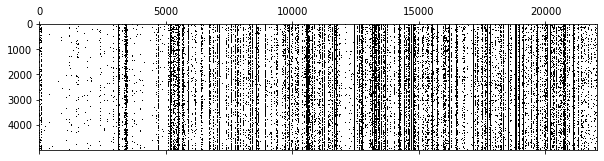

In [7]:
plt.figure(figsize=(10, 4))
plt.spy(df_cite_train_x[:5000])
plt.show()

* lots of data contain Zero vals
Due to the large volume of the data set And of course available columns has been repeated several times.

But in this information, the number of zeros is very high (approximatly eighty percent). There are even columns where all the rows are zero (the zero value indicates that there are cells that do not express these genes). Therefore, all zero values should be removed  

In [8]:
print('Shape:', df_cite_train_x.shape)

Shape: (70988, 22050)


## Link

In [ ]:
df_meta.head()

* For each cell, we see the day column tells us on which day the test was performed.
* The test that was actually performed is shown in the technology column.
* Note that experiments started on day 1, therefore the first tests were performed one day after the cells were injected with Neupogen for the first time For each of the four donors, we have a donor ID giving us information about the origin of the cell.
* there is a cell_type column. The cell types are labels assigned by humans. They might be imprecise and this information is not available for test data since it would be possible to draw conclusions about surface protein levels, 

## For memory efficiency

* Dimensionality reduction and feature selection .
*   sparse array data structures.
* Load all indexes from chunk

In [9]:
# Load all indexes from chunk
cell_id = []
for i in range(20):
    path_h5 = os.path.join(DATA_DIR, "train_multi_targets.h5")
    df = pd.read_hdf(path_h5, start=i * 10000, stop=(i+1) * 10000)
    print(i, len(df), df["ENSG00000121410"].mean())
    if len(df) == 0:
        break
    cell_id += list(df.index)

df_multi_ = pd.DataFrame({"cell_id": cell_id}).set_index("cell_id")
display(df_multi_.head())

0 10000 0.6923781
1 10000 0.5256491
2 10000 0.46140882
3 10000 0.5632183
4 10000 0.58635724
5 10000 0.49829003
6 10000 0.38224626
7 10000 0.55561715
8 10000 0.4656229
9 10000 0.40620038
10 5942 0.2528025
11 0 nan


""
cell_id
56390cf1b95e
fc0c60183c33
9b4a87e22ad0
81cccad8cd81
15cb3d85c232


In [10]:
#after chunks link with the csv
df_multi_ = df_multi_.join(df_meta, how="left")

print(f"total: {len(df_multi_)}")
print(f"cell_id: {len(df_multi_)}")
display(df_multi_.head())

total: 105942
cell_id: 105942


,day,donor,cell_type,technology
cell_id,,,,
56390cf1b95e,2,32606,NeuP,multiome
fc0c60183c33,2,32606,HSC,multiome
9b4a87e22ad0,2,32606,MasP,multiome
81cccad8cd81,2,32606,HSC,multiome
15cb3d85c232,2,32606,MkP,multiome


## sparcity

In [11]:
#To speed up the computation, we compute the indptr array by exploiting Cython.
#In this way, we can halve the time required to compress the huge array of row indices to extract the indptr array
%load_ext Cython

In [12]:
%%cython

import cython
cimport cython
cimport numpy as np
import numpy as np
from tqdm import tqdm, trange

ctypedef np.int64_t INT64_t

@cython.boundscheck(False)
@cython.wraparound(False)
cpdef np.ndarray[INT64_t, ndim=1] create_indptr(INT64_t[:] row_indices, int start_pos, int nrows):
    cdef int shape = row_indices.shape[0]
    res = np.zeros(nrows, dtype=np.int64)
    cdef INT64_t[:] res_view = res
    
    cdef int i
    cdef int curr_row = 0
    cdef int prev = row_indices[0]
    
    for i in range(shape):
        if row_indices[i] != prev:
            curr_row += 1
            res_view[curr_row] = i
            prev = row_indices[i]
    # res_view[curr_row + 1] = shape
    return res + start_pos

In [17]:

##creating sparse matrix code get from another notebook

def create_csr_arrays(h5_file_path):
    def check_size(xs, ys, datas):
        return (xs.nbytes + ys.nbytes + datas.nbytes) * 1e-9

    print(f"\n\nProcessing File {h5_file_path}")
    pbar = tqdm()

    # Initialize Variables
    chunksize = 1000 # Keep it low
    loaded_rows = chunksize
    start = 0
    start_pos = 0
    file_pointer = 0

    # Initialize CSR arrays
    indptr = np.array([], dtype=np.int64)
    indices = np.array([], dtype=np.int32)
    data_s = np.array([], dtype=np.float32)
    
    prefix_filename = h5_file_path.split('/')[-1].replace('.h5', '')

    while chunksize == loaded_rows:

        # Check current size: if the total sum of sizes are > 7GB, then save three arrays and re-initialize them
        size_gb = check_size(indptr, indices, data_s)
        if size_gb > 7.0:
            pbar.set_description(f"Total size is {size_gb}. Saving ..")
            np.save(f"{prefix_filename}_indptr_{file_pointer}.npy", indptr)
            np.save(f"{prefix_filename}_indices_{file_pointer}.npy", indices)
            np.save(f"{prefix_filename}_data_{file_pointer}.npy", data_s)
            # Re-initialize
            indptr = np.array([], dtype=np.int64)
            indices = np.array([], dtype=np.int32)
            data_s = np.array([], dtype=np.float32)
            # Increment pointer
            file_pointer += 1

        pbar.set_description("Reading .h5 chunk")
        df = pd.read_hdf(h5_file_path, start=start, stop=start+chunksize)
        pbar.set_description("Extracting non-zero values")
        x_coords, y_coords = df.values.nonzero()
        tmp_data = df.values[df.values != 0.0]

        loaded_rows = df.shape[0]

        # Convert types
        y_coords = y_coords.astype(np.int32, copy=False)
        tmp_data = tmp_data.astype(np.float32, copy=False)

        # Compress x_coords
        pbar.set_description("Compressing rows values")
        x_coords = create_indptr(x_coords, start_pos=start_pos, nrows=loaded_rows)

        gc.collect()

        # Update variables
        pbar.set_description("Update variables")
        start_pos += y_coords.shape[0]
        start += chunksize
        # Append data at the end of each array
        indptr = np.hstack((indptr, x_coords))
        indices = np.hstack((indices, y_coords))
        data_s = np.hstack((data_s, tmp_data))

        pbar.update(loaded_rows)

    print('Done. Save last files')
    np.save(f"{prefix_filename}_indptr_{file_pointer}.npy", indptr)
    np.save(f"{prefix_filename}_indices_{file_pointer}.npy", indices)
    np.save(f"{prefix_filename}_data_{file_pointer}.npy", data_s)
    
    del indptr, indices, data_s


In [ ]:
create_csr_arrays(FP_CITE_TRAIN_INPUTS) # This will create three different arrays
# The previous command will create and save three different array in .npy format:

# train_multi_inputs_indptr_0.npy
# train_multi_inputs_indices_0.npy
# train_multi_inputs_data_0.npy



Processing File /kaggle/input/open-problems-multimodal/train_cite_inputs.h5





0it [00:00, ?it/s]


Reading .h5 chunk: : 0it [00:00, ?it/s]


Extracting non-zero values: : 0it [00:01, ?it/s]


0it [03:18, ?it/s]alues: : 0it [00:02, ?it/s]   
0it [02:26, ?it/s]



Update variables: : 0it [00:03, ?it/s]       


Update variables: : 1000it [00:03, 326.36it/s]


Reading .h5 chunk: : 1000it [00:03, 326.36it/s]


Extracting non-zero values: : 1000it [00:04, 326.36it/s]


Compressing rows values: : 1000it [00:04, 326.36it/s]   


Update variables: : 1000it [00:05, 326.36it/s]       


Update variables: : 2000it [00:05, 410.36it/s]


Reading .h5 chunk: : 2000it [00:05, 410.36it/s]


Extracting non-zero values: : 2000it [00:06, 410.36it/s]


Compressing rows values: : 2000it [00:06, 410.36it/s]   


Update variables: : 2000it [00:06, 410.36it/s]       


Update variables: : 3000it [00:06, 460.71it/s]


Reading .h5 chunk: : 3000it [00:06, 460.71it/s]


Extracting non-zero values: : 3000it [00:07, 460.71it/s]


Compressing rows values: : 3000it [00:08, 460.71it/s]   


U

In [ ]:
# indptr = np.load('train_multi_inputs_indptr_0.npy')
# indices = np.load('train_multi_inputs_indices_0.npy')
# data = np.load('train_multi_inputs_data_0.npy')
# # Since indptr array has shape (Number of Rows) instead of (Number of Rows + 1), we can add the last element to the array, which corresponds to the length of indices or data arrays.

# indptr = np.append(indptr, indptr[-1] + indices[indptr[-1]:].shape)

In [ ]:
# ##using scipy
# _ROWS = 105942
# N_COLS = 228942
# # csr_matrix = sps.csr_matrix((data, indices, indptr), shape=(N_ROWS, N_COLS))
# # sps.save_npz('train_multiome_input_sparse.npz', csr_matrix)